<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/sklearnPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
from sklearn import tree
import pandas as pd
import numpy as np

In [94]:
np.random.seed(0)

In [95]:
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

In [96]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [97]:
y = df.num
X = df[['sex','exang']]

In [104]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'exang <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]\nclass = 0'),
 Text(0.25, 0.5, 'sex <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]\nclass = 0'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]\nclass = 0'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]\nclass = 0'),
 Text(0.75, 0.5, 'sex <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]\nclass = 1'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]\nclass = 1'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]\nclass = 1')]

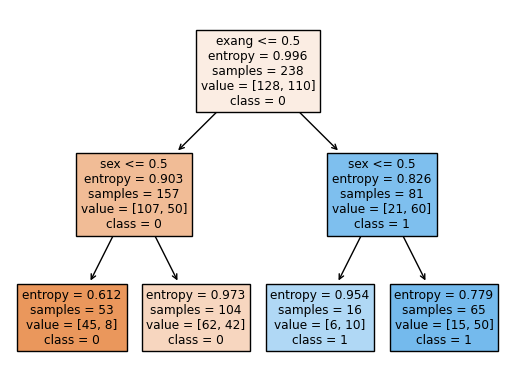

In [106]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['0', '1'],
               filled=True)

In [111]:
information_gain = 0.996 - (157 / 238) * 0.903 - (81 / 238) * 0.826
information_gain

0.11920588235294122

TASK 2

In [112]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

In [113]:
iris = load_iris()
X = iris.data
y = iris.target

In [114]:
params = {'criterion': ['entropy', 'gini'],
          'max_depth': range(1, 30 + 1)}

In [115]:
tree = DecisionTreeClassifier()
search = GridSearchCV(tree, params, cv=5)
search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 31)})

In [116]:
best_tree = search.best_estimator_

TASK 3

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris

In [118]:
iris = load_iris()
X = iris.data
y = iris.target

In [121]:
params = {'max_depth': range(1, 20 + 1),
         'min_samples_split': range(2, 10 + 1),
         'min_samples_leaf': range(1, 10 + 1)}

tree = DecisionTreeClassifier()
search = RandomizedSearchCV(tree, params, cv=5)
search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': range(1, 21),
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11)})

In [122]:
best_tree = search.best_estimator_